In [5]:
import agents
import game
import mechanisms

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

In [6]:
import importlib
importlib.reload(agents)
importlib.reload(game)
importlib.reload(mechanisms)

<module 'mechanisms' from 'C:\\Users\\billz\\PycharmProjects\\CS_281\\Finding_Friends\\mechanisms.py'>

In [7]:
NUM_PLAYERS = 3
BASE_LVL = 0
LVL_CAP = 50
WIN_PROB = 1.0

skill_levels = np.random.randint(1, 5, size=NUM_PLAYERS)
print(skill_levels)

ff_agents = [agents.Basic_Agent(i, BASE_LVL) for i in range(NUM_PLAYERS - 1)]
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 3, BASE_LVL))
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 2, BASE_LVL))
ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 1, BASE_LVL))

ff_mech = mechanisms.Baseline_Mechanism(num_players=NUM_PLAYERS, p=WIN_PROB)
# ff_mech = mechanisms.Skill_Mechanism(num_players=NUM_PLAYERS, skill_levels=skill_levels)

ff_game = game.Game(players=ff_agents, mechanism=ff_mech, cap=LVL_CAP, logging_level='DEBUG')

[4 2 3]


In [19]:
NUM_TRIALS = 1000
results = []

for i in range(NUM_TRIALS):
    ff_game.play()
    results.append(ff_game.levels)
    ff_game.reset()

results = np.array(results)

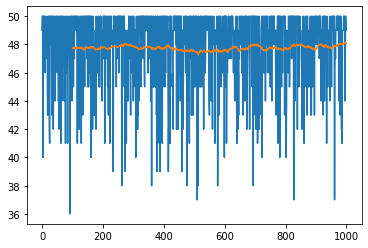

In [20]:
plt.plot(results[:, 0])
means = torch.tensor(results[:, 0], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

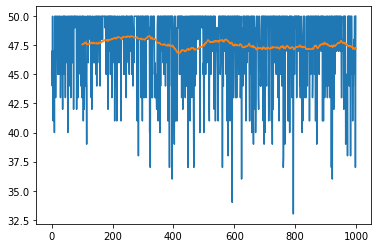

In [21]:
plt.plot(results[:, -1])
means = torch.tensor(results[:, -1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

In [25]:
np.sum([results[i][-1] == 50 for i in range(len(results))]) / NUM_TRIALS

0.46